In [1]:
from api_request import CreateYoutubeRequest
import pandas as pd
from cleaning import CleanYoutubeCSV
%load_ext autoreload
%autoreload 2

In [1]:
from cleaning import CleanYoutubeCSV
import pandas as pd

In [2]:
cleaner = CleanYoutubeCSV()

In [3]:
df = pd.read_csv('MarquesBrownlee.csv')

In [4]:
df = cleaner.add_dummies(df)

In [5]:
df = df.drop(columns = ['title', 'publish_hour', 'publish_day', 'season', 'day_part'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 22 columns):
comment_count            1116 non-null int64
dislike_count            1116 non-null int64
duration                 1116 non-null int64
like_count               1116 non-null int64
live                     1116 non-null int64
view_count               1116 non-null int64
publish_month            1116 non-null int64
publish_date             1116 non-null object
days_after_last_video    1116 non-null int64
title_length             1116 non-null int64
description_length       1116 non-null int64
tag_count                1116 non-null int64
season_fall              1116 non-null uint8
season_summer            1116 non-null uint8
season_winter            1116 non-null uint8
day_part_afternoon       1116 non-null uint8
day_part_evening         1116 non-null uint8
day_part_overnight       1116 non-null uint8
review                   1116 non-null int64
apple                    1116 non-nul

In [7]:
df.head()

,comment_count,dislike_count,duration,like_count,live,view_count,publish_month,publish_date,days_after_last_video,title_length,...,season_fall,season_summer,season_winter,day_part_afternoon,day_part_evening,day_part_overnight,review,apple,google,samsung
0,6,5,315,33,0,2420,5,2008-05-30,62,37,...,0,0,0,0,1,0,0,0,0,0
1,40,18,574,159,0,14148,9,2008-09-16,109,41,...,1,0,0,0,0,1,0,0,0,0
2,8,1,139,36,0,2557,1,2009-01-01,107,48,...,0,0,1,0,1,0,0,0,0,0
3,6,5,219,26,0,2270,1,2009-01-01,0,36,...,0,0,1,0,1,0,0,0,0,0
4,10,2,350,38,0,3479,1,2009-01-29,28,32,...,0,0,1,0,1,0,0,0,0,0


In [8]:
df.to_csv('MarquesBrownlee_cleaned.csv')

In [14]:
df_regression = df[['duration', 'title_length', 'description_length', 'tag_count', 'days_after_last_video', 'view_count', 'comment_count', 'like_count', 'dislike_count']]

In [15]:
df_regression

,duration,title_length,description_length,tag_count,days_after_last_video,view_count,comment_count,like_count,dislike_count
0,315,37,273,17,62,2420,6,33,5
1,574,41,214,11,109,14148,40,159,18
2,139,48,234,6,107,2557,8,36,1
3,219,36,395,21,0,2270,6,26,5
4,350,32,253,7,28,3479,10,38,2
...,...,...,...,...,...,...,...,...,...
1111,427,34,392,13,6,2866095,5626,93401,1716
1112,535,57,440,12,1,6638374,17075,165770,4727
1113,631,37,561,7,5,2471610,6513,80560,2281
1114,512,43,527,20,3,7251867,34333,185117,6585


In [153]:
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
y = df_regression['view_count']
X = df_regression.drop(columns='view_count')

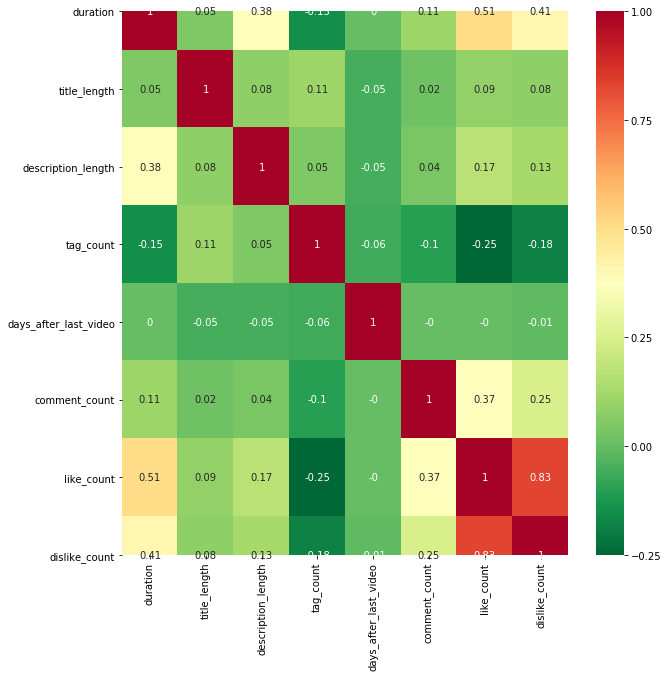

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(round(X_train.corr(), 2), cmap = 'RdYlGn_r', annot = True)

In [155]:
X['like_ratio'] = X['like_count'] / (X['like_count'] + X['dislike_count'])

In [156]:
X.drop(columns = ['like_count', 'dislike_count'], inplace = True)

In [157]:
X.corr()['like_ratio']

duration                 0.178079
title_length            -0.177563
description_length       0.072578
tag_count               -0.257214
days_after_last_video    0.061569
comment_count            0.114361
like_ratio               1.000000
Name: like_ratio, dtype: float64

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

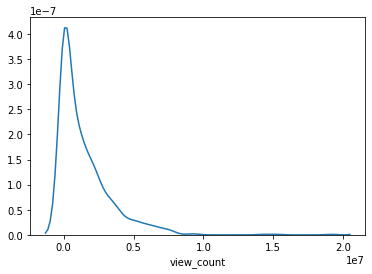

In [159]:
import numpy as np
sns.distplot(y_train, hist = False);

In [170]:
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)

In [171]:
pd.DataFrame(X_train_scale, columns = X.columns)

,duration,title_length,description_length,tag_count,days_after_last_video,comment_count,like_ratio
0,0.051691,0.301587,0.006236,0.057971,0.000000,0.000040,0.952228
1,0.204042,0.380952,0.262202,0.057971,0.015385,0.012137,0.939418
2,0.085892,0.587302,0.085141,0.376812,0.015385,0.000162,0.689067
3,0.228527,0.444444,0.134219,0.318841,0.025641,0.014548,0.950909
4,0.068014,0.269841,0.069143,0.115942,0.020513,0.000596,0.977212
...,...,...,...,...,...,...,...
887,0.210260,0.380952,0.116866,0.173913,0.015385,0.016178,0.943636
888,0.209483,0.539683,0.098698,0.144928,0.005128,0.007184,0.941969
889,0.187719,0.349206,0.136931,0.130435,0.020513,0.023069,0.943328
890,0.078119,0.507937,0.027657,0.260870,0.015385,0.000091,0.764732


In [172]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X_train_scale, y_train)

In [178]:
y_train_hat = model.predict(X_train_scale)

In [177]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_hat)

0.26852293804511607

In [179]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(linreg, X_train, y_train, cv = 5 )

array([0.3764505 , 0.14826599, 0.29494579, 0.20458007, 0.0737324 ])